<a href="https://colab.research.google.com/github/hdpark1208/StudyCode/blob/main/8)%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***4-2 확률적 경사 하강법(Stochastic Gradient Descent)***

# **줄거리**

1.    점진적인 학습의 필요성을 생각해본다  
2.    경사 하강법과 손실 함수에 대해 알아본다
3.    데이터를 준비하고 전처리, 훈련/테스트 세트를 나누는 작업을 한다  
4.    SGDClassifier 을 이용하여 결과를 확인한다  
5.    partial_fit() 을 이용하여 에포크에 따른 훈련/테스트 세트의 점수를 그래프로 표현하고 최적의 에포크를 확인한다


#Note
*    로지스틱 손실 함수 : 이진 분류에서 사용
*    이진 크로스엔트로피 : 다중 분류에서 사용
*    평균 제곱 오차 : 회귀에서 사용  
*    확률적 경사 하강법 : 훈련세트에서 샘플을 하나씩 꺼내 손실 함수의 경사를 따라 최적의 모델을 찾는 알고리즘  
(배치 경사 하강법 : 한 번에 전체 샘플 사용 시  
미니배치 경사 하강법 : 한번에 여러 개의 샘플을 사용 시)

#**코드**


In [ ]:
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv_data')

In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()
print(fish.head())

  Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340


In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target= train_test_split(fish_input,fish_target,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)    #train_input 데이터를 이용해 StandardSclaer의 인스턴스를 학습시킨다. 여기서는 train_input의 평균,분산을 구하는 과정이다
train_scaled = ss.transform(train_input)    #위에서 학습된 것을 적용시킨 train_scaled 데이터를 만든다
test_scaled = ss.transform(test_input)    #같은 환경(train_input으로 학습시킨)에서 test_input을 transform 하여 test_scaled 데이터를 만든다


In [ ]:
from sklearn.linear_model import SGDClassifier    #확률적 경사 하강법을 제공하는 대표적인 분류용 클래스

In [ ]:
sc = SGDClassifier(loss='log',max_iter=10,random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))


0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [ ]:
sc.partial_fit(train_scaled, train_target)    #모델을 이어서 훈련 시 ?
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8151260504201681
0.825


In [ ]:
import numpy as np
sc = SGDClassifier(loss = 'log',random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [ ]:
for _ in range(0,300):    # _ : 나중에 사용하지않고 버리는 값을 넣어두는 용도
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled,train_target))
  test_score.append(sc.score(test_scaled,test_target))

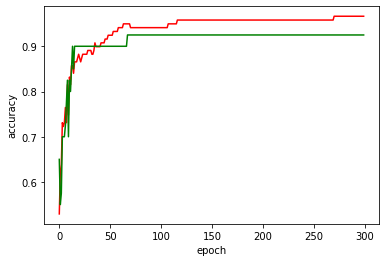

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_score,c='r')
plt.plot(test_score,c='g')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()    #epoch = 100 이 적당해 보인다

In [ ]:
sc = SGDClassifier(loss = 'log',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))


0.957983193277311
0.925


In [ ]:
sc = SGDClassifier(loss = 'hinge',max_iter=100,tol=None,random_state=42)    #SGDClassifier 의 loss default는 hinge 이다
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.9495798319327731
0.925
